<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 4*

# 📝 Assignment


# Breast Cancer Clustering



## 1. 아래의 주소를 참조하여, 데이터를 `df`에 준비하세요.

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

- Feature마다 scale이 다르기 때문에 `StandardScaler`를 적용해야합니다.
- 이후,  "diagnosis"에 있는 label 데이터를 따로 `label`이라는 변수로 생성하세요.
- "diagnosis"를 제거한 나머지 데이터를 사용하여 k-means clustering을 하며, 
- `n_clusters = 2`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#데이터 불러오기
df = pd.read_csv('data.csv')

#Diagnosis -> Label로 저장
label = df['diagnosis']

#숫자 데이터만 도출
df = df.drop('diagnosis', axis=1)

#의미없는 데이터 제거
df = df.drop('Unnamed: 32', axis=1)
df = df.drop('id', axis=1)


#정규화
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
df

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

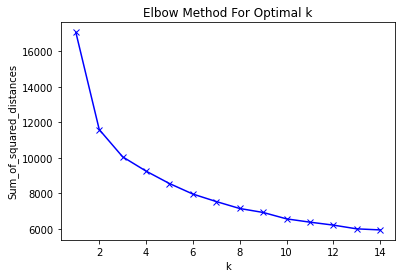

In [ ]:
#Elbow methods
sum_of_sqd = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    sum_of_sqd.append(km.inertia_)

plt.plot(K, sum_of_sqd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
#K-Means Clustering 
k2_means = KMeans(n_clusters=2, random_state=42)
k2_means.fit(df)
clusters = k2_means.labels_
series = pd.Series(clusters)
series

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

In [ ]:
#PCA & DataFrame
pca = PCA(n_components = 2)
pc = pca.fit_transform(df)
final_df = pd.DataFrame(data = pc, columns = ['PC1','PC2'])
final_df['Cluster'] = series
final_df

,PC1,PC2,Cluster
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


In [ ]:
label_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2'])
label_df['Diagnosis'] = pd.Series(label)
label_df

,PC1,PC2,Diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


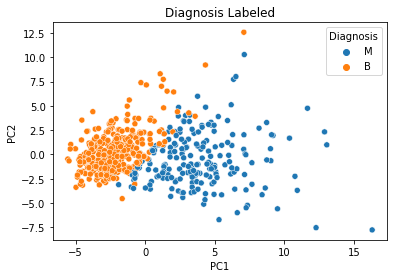

In [ ]:
sns.scatterplot(data = label_df ,x='PC1',y='PC2', hue='Diagnosis')
plt.title('Diagnosis Labeled')
plt.show()

In [ ]:
#여기서 부터는 90퍼센트 이상 찾기 구현 그래프 연습

pca = PCA(n_components = 14)
pc = pca.fit_transform(df)
final_df = pd.DataFrame(data = pc, columns = ['PC1','PC2','PC3','PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
final_df['Cluster'] = series
final_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Cluster
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157119,-0.877402,0.262955,-0.859015,0.103391,-0.690802,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106994,0.813118,0.157922,-0.943523,-0.653473,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454276,-0.605603,0.124388,-0.410630,0.016678,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933269,-0.487417,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377705,0.651360,-0.110515,0.387947,-0.539181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,-0.062650,0.123343,-0.051728,-0.404293,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108633,0.244803,0.222752,-0.192637,0.015556,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,-0.840512,0.096473,0.157418,0.285691,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280238,-0.542034,-0.089295,-0.178625,-0.697459,1.225183,0.218692,0


In [ ]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978,
       0.00979719, 0.00870538, 0.00804525, 0.00523366])

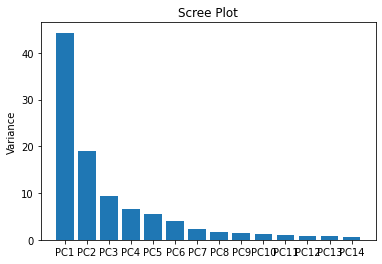

In [ ]:
percentage = np.round(pca.explained_variance_ratio_*100, decimals=1)

plt.title('Scree Plot')
plt.bar(x= ['PC1','PC2','PC3','PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'], height=percentage)
plt.ylabel('Variance')

plt.show()

Text(0, 0.5, 'Variance')

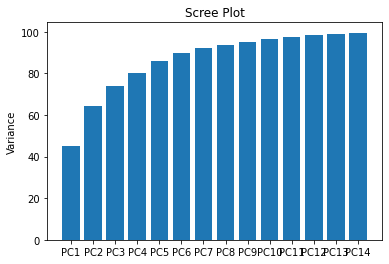

In [ ]:
cumulative_percentage = []
cumulation = 1
for cum in range(len(percentage)):
  cumulation += percentage[cum]
  cumulation
  cumulative_percentage.append(cumulation)

plt.title('Scree Plot')
plt.bar(x= ['PC1','PC2','PC3','PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'], height=cumulative_percentage)
plt.ylabel('Variance')


## 2. 원래 데이터의 label과, clustering 이후의 라벨을 비교하여 accuracy를 측정하고 결과를 `Acc`에 저장하세요. 

- Acc = 전체 데이터 중 라벨이 일치하는 데이터 수 입니다.

ex)

|원래 라벨|cluster 이후 label|
|:-:|:-:|
|A|A|
|A|B|
|A|A|
|B|B|
|B|B|
|B|A|

accuracy = $(2 + 2) \over 6$

이때 아래의 코드를 참고하여 `0`과 `1`로 있는데이터를 `M`과 `B`로 바꿔서 작업하면 좋습니다. 

```python
label2 = label2.replace(0,'M')
label2 = label2.replace(1,'B')
```

In [ ]:
compare_df = pd.DataFrame(data = pc, columns = ['PC1','PC2'])
compare_df['Cluster'] = series
compare_df['Diagnosis'] = pd.Series(label)

revised_df = compare_df
revised_df['Cluster'] = revised_df['Cluster'].replace(0, 'M')
revised_df['Cluster'] = revised_df['Cluster'].replace(1, 'B')
revised_df

,PC1,PC2,Cluster,Diagnosis
0,9.192837,1.948583,M,M
1,2.387802,-3.768172,M,M
2,5.733896,-1.075174,M,M
3,7.122953,10.275589,M,M
4,3.935302,-1.948072,M,M
...,...,...,...,...
564,6.439315,-3.576817,M,M
565,3.793382,-3.584048,M,M
566,1.256179,-1.902297,M,M
567,10.374794,1.672010,M,M


In [ ]:
compare_correct = (revised_df['Cluster'] == revised_df['Diagnosis']).sum()
compare_wrong = (revised_df['Cluster'] != revised_df['Diagnosis']).sum()
total = compare_correct + compare_wrong
print(compare_correct, compare_wrong, total)

515 54 569


In [ ]:
accuracy = compare_correct/total
accuracy

0.9050966608084359

# 🔥 도전 과제

아래 링크를 참조하여 hierarchical clustering을 breast cancer dataset에 적용하고, 그 결과를 시각화하세요.

<https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering>


TypeError: ignored

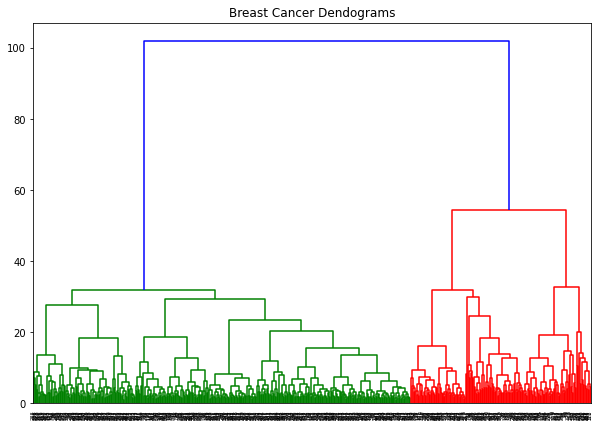

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Breast Cancer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

In [ ]:
from sklearn.cluster.hierarchical import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, 'ward')

In [ ]:
Z[:10].round(0)

array([[ 79., 362.,   1.,   2.],
       [457., 458.,   1.,   2.],
       [271., 390.,   1.,   2.],
       [  6., 317.,   1.,   2.],
       [ 90., 545.,   1.,   2.],
       [298., 477.,   1.,   2.],
       [ 74., 137.,   1.,   2.],
       [107., 497.,   1.,   2.],
       [425., 522.,   1.,   2.],
       [158., 294.,   1.,   2.]])

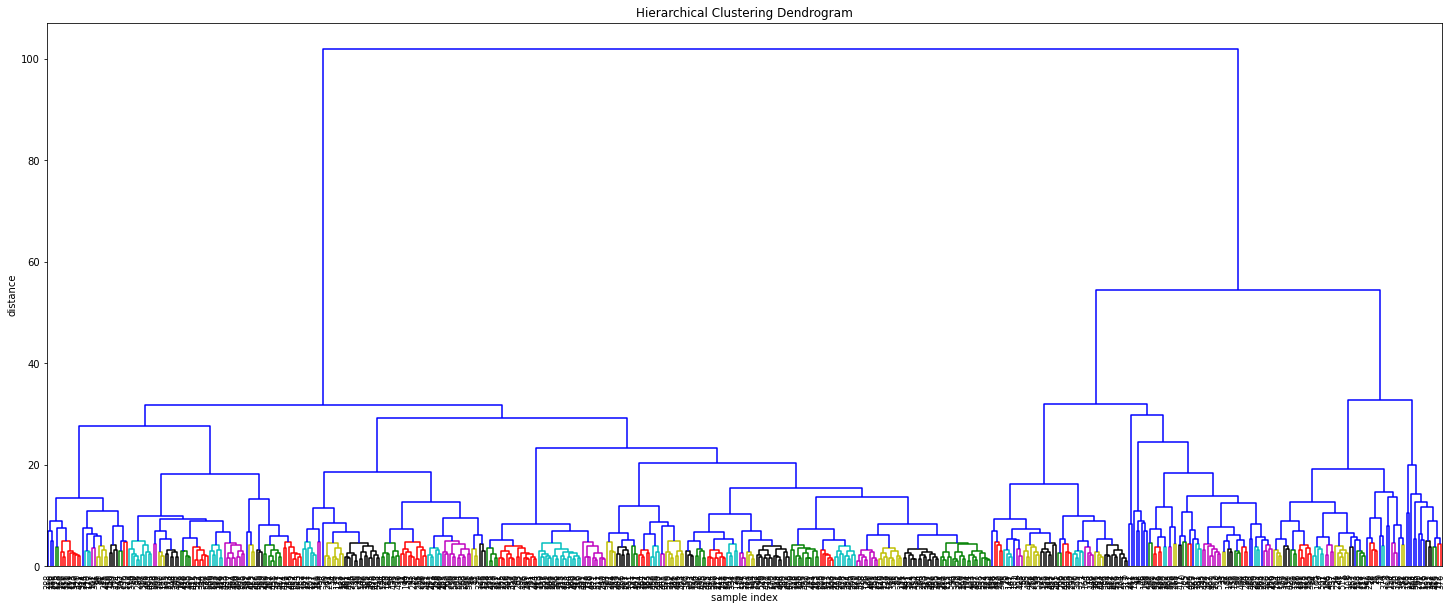

In [ ]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    color_threshold=5
)
plt.show()

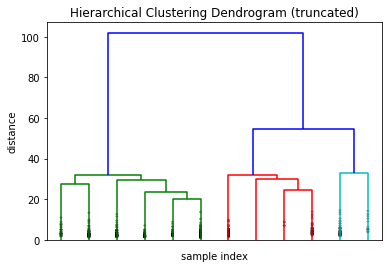

In [ ]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last pa merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
    color_threshold=50
)
plt.show()